# Cálculo de potencial eléctrico por diferencias finitas hasta una determinada precisión (con controles interactivos)

Esta es una forma de resolver el potencial eléctrico por medio de diferencias finitas hasta una determinada precisión, incluyendo controles interactivos, para el caso de la placa cuadrada de lado L que se muestra seguidamente.

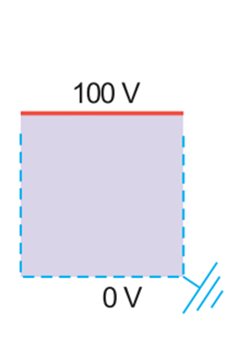

Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational Physics: Introductory Computational Science. Princeton: Princeton University Press.

# Bibliotecas necesarias

In [9]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
 
import numpy as np
import matplotlib.pyplot as plt

---
**Instrucción 1: les corresponde analizar el algoritmo dado en la sección "Función para calcular el potencial aproximado en cualquier punto (x, y) la placa", para entenderlo y posteriormente comentarlo de manera amplia, con el objetivo de que pueda ser trabajado con más facilidad por otras personas. Al menos deben incluir comentarios en las líneas en que se indica en dicho código.**
---

# Función para calcular el potencial aproximado en cualquier punto (x, y) la placa

In [13]:
def AproxUXY(uxy, pm, prec):
    '''Calcula el valor aproximado del potencial eléctrico en el punto (x, y)
 
    Parámetros de la función
    ------------------------
    uxy : matriz con los valores iniciales del potencial electrico en cada
           punto de la malla
    pm : número de puntos de la malla
    prec : precisión requerida para el cálculo aproximado de los valores del
            potencial en la malla
 
    Salida de la función
    --------------------
    valorAproxUXY : matriz con los valores finales del potencial eléctrico
                    cada punto de la malla
    '''

    # Se inicializa la variable contador_iteraciones que dirá la cantidad de veces que itere el ciclo while, rompe el ciclo (dandole un valor determinado a canasta_imprec)con un máximo de 500 iteraciones
    contador_iteraciones = 0

    # Se inicializa la variable canasta_imprec que rompe el ciclo while si se alcanza la precisión
    canasta_imprec = 1

    # Se realiza el cálculo iterativo del potencial aproximado en cada punto
    # de la malla iniciando en la esquina superior izquierda de esta, hasta
    # que se alcanza la precisión requerida
    while canasta_imprec > 0:
      # Se cuentan las iteraciones que se realizan, se suma 1 iteración cada vez
      contador_iteraciones += 1

      # Se da el valor de cero a canasta_imprec para que se siga iterando, el código pasa por aquí si la precisión no se alcanzó
      canasta_imprec = 0

      for m in range(1, pm-1, 1):
        for n in range(1, pm-1, 1):
          # Se define el valor en la iteración anterior, esto para poder compararlo con el valor actual a la hora de calcular el error
          uxy_anterior = uxy[m, n]
          
          # Se aplica el método de Gauss-Siedel para esta EDP particular
          uxy[m, n] = 0.25*(uxy[m+1,n]+uxy[m-1,n]+uxy[m,n+1]+uxy[m,n-1])

          
          # Se calcula el error absoluto como valor absoluto(dato_actual-dato_anterior)
          dif = np.abs([uxy[m,n]-uxy_anterior])[0]
          
          # Compara el error con la precisión deseada, si el error es mayor a la precisión se debe seguir iterando, por ende se le da un valor mayor a cero a canasta_imprec 
          if dif > prec:
            canasta_imprec += 1
            #Se pone un techo de 500 a la cantidad de iteraciones que la máquina debe realizar, esto para evitar que con una precisión muy pequeña se calculen muchas iteraciones al punto que se encicle el while
          # Si se llegan a 500 iteraciones se le da un valor de cero a canasta_imprec para que se rompa el ciclo y no itere más, por ende aunque se desee muy buena precisión la máquina solo hará 500 iteraciones, independientemente de la precisión que se alcance en ese punto
          if contador_iteraciones > 500:
            canasta_imprec = 0
          
    
    valorAproxUXY = uxy
    print("Cantidad iteraciones para alcanzar precisión: ", contador_iteraciones)
    return valorAproxUXY

# Cálculo del potencial aproximado y montaje de la presentación gráfica

In [14]:
def Grafico_interactivo(lado, potencial, prec):
  '''Calcula el valor aproximado del potencial eléctrico en una malla de puntos
  y lo 
 
  Parámetros de la función
  ------------------------
  lado : arista de la placa cuadrada sujeta al potencial eléctrico
  potencial : valor del potencial eléctrico en el lado superior de la placa
  prec : precisión requerida para el cálculo aproximado de los valores del
            potencial en la malla
 
  Salida de la función
  --------------------
  Z : conjunto de valores del potencial aproximado en los puntos de la malla
      y gráfico 3D
  '''
 
  # Se define la malla de puntos para evaluar el potencial eléctrico
  puntosmalla = 30
  x = np.linspace(0, lado, puntosmalla)
  y = np.linspace(0, lado, puntosmalla)
  X, Y = np.meshgrid(x, y)
  
  # Se inicializa la matriz con los valores iniciaes del potencial en cada
  # punto de la malla
  uxyi = np.zeros((puntosmalla, puntosmalla), float)

  # Se establecen las condiciones de frontera para el caso particular de la
  # placa cuadrada
  for i in range(0, puntosmalla):
    uxyi[puntosmalla-1,i] = potencial

  # Se calcula el valor aproximado del potencial eléctrico en los puntos de
  # la malla y se asignan al eje Z
  Z = AproxUXY(uxyi, puntosmalla, prec/1000)
 
  plt.figure(figsize=(10,6))
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x (m)')
  ax.set_ylabel('y (m)')
  ax.set_zlabel('U (V)')
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
  ax.set_title('Aproximacion potencial electrico en la placa')
  plt.show()
 
  return

# Interactividad con la presentación gráfica

In [15]:
y=interactive(Grafico_interactivo, {'manual': True}, lado=widgets.IntSlider(min=1.0, max=5.0, step=1.0, value=1.0, description='L (m):'),
              potencial=widgets.IntSlider(min=25.0, max=150.0, step=25.0, value=25.0, description='U0 (V):'),
              prec=widgets.IntSlider(min=1.0, max=1000.0, step=1.0, value=1000.0, description='Prec (mV):'))
display(y)

interactive(children=(IntSlider(value=1, description='L (m):', max=5, min=1), IntSlider(value=25, description=…

---
**Instrucción 2: describan al menos una forma adicional en que se podría haber preparado un código que llevara a una ejecución iteractiva hasta alcanzar una determinada precisión. Esta descripción es en prosa, sin escribir código como tal, pero pueden utilizar pseudocódigo como complemento si les parece necesario.**
---
El cálculo del error actualmente se hace sobre todos los valores de la malla,mientras se van calculando, y se comparan con los anteriores. Otra forma sería calcular el error para ciertas posiciones una vez que itere sobre toda la malla, se puede calcular el error únicamente sobre una posición y esto compararlo con la misma posición de la malla de la iteración anterior o bien sobre algunos puntos en especial e incluso sacar un promedio sobre ellos, al hacer esto podemos perder un poco de la calidad de los datos al solo calcular sobre unos datos, pero se gana eficiencia y rapidez de ejecución, porque no se hace sobre todos los datos, considerando que la malla podría tener una extensión mucho más grande.
